C:\Users\92312\AppData\Local\Temp\ipykernel_10328\2659276725.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = train.groupby(pd.Grouper(key="Date", freq="M"))["Weekly_Sales"].sum()


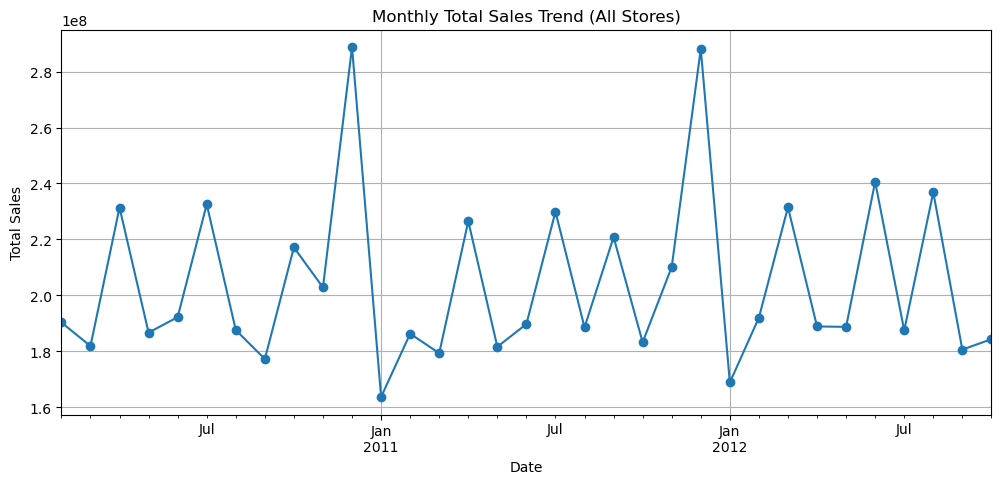

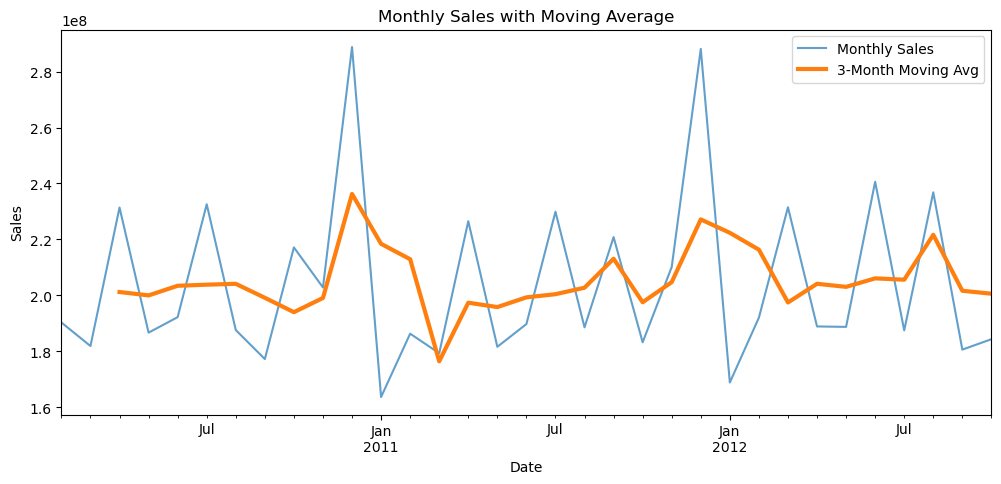

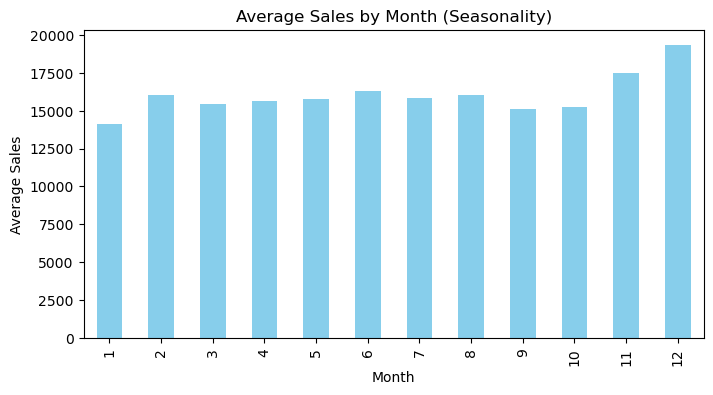

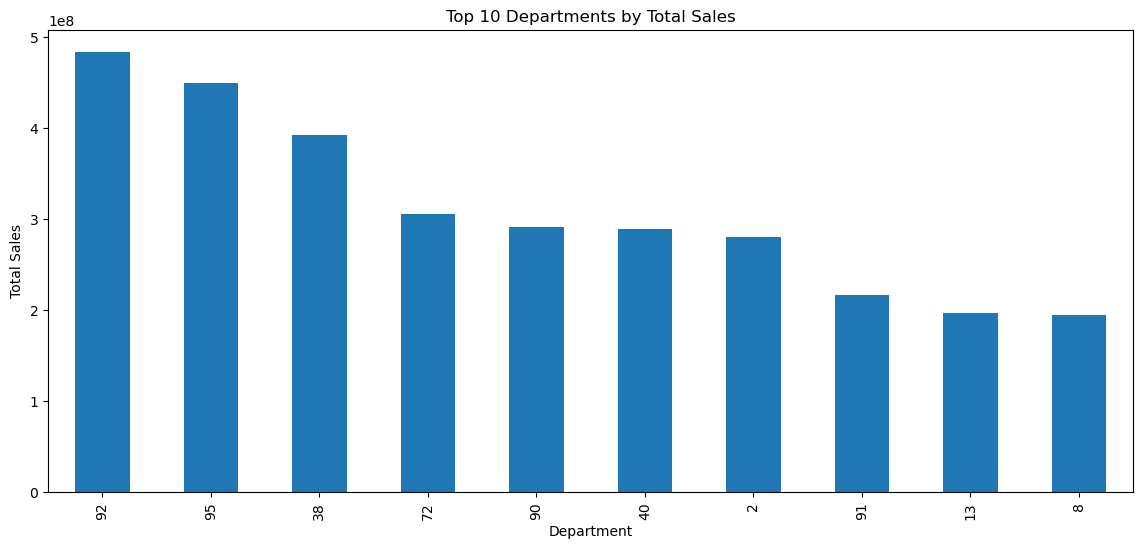

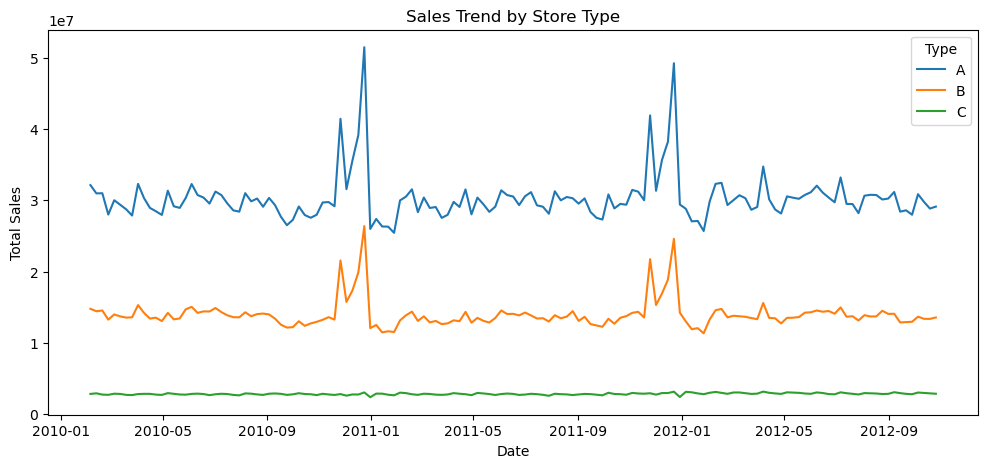

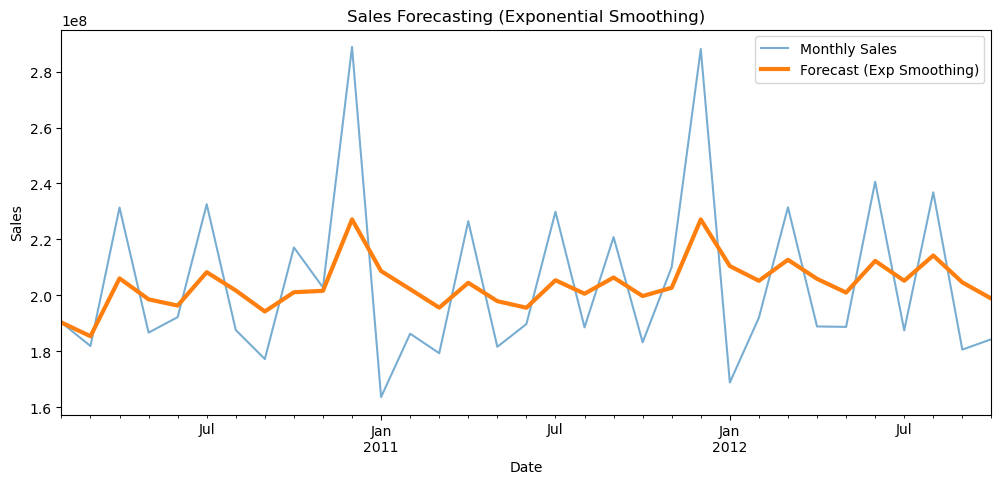

In [5]:
# Task 7: Time Series Breakdown of Retail Sales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Load datasets
# -----------------------------
train = pd.read_csv("Walmart.csv")
stores = pd.read_csv("stores.csv")

# Convert Date column to datetime
train["Date"] = pd.to_datetime(train["Date"])

# -----------------------------
# Aggregate Monthly Sales
# -----------------------------
# Sum sales across all stores/departments per month
monthly_sales = train.groupby(pd.Grouper(key="Date", freq="M"))["Weekly_Sales"].sum()

# -----------------------------
# Plot Overall Trend
# -----------------------------
plt.figure(figsize=(12,5))
monthly_sales.plot(marker="o")
plt.title("Monthly Total Sales Trend (All Stores)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# -----------------------------
# Moving Average (Rolling Mean)
# -----------------------------
plt.figure(figsize=(12,5))
monthly_sales.plot(label="Monthly Sales", alpha=0.7)
monthly_sales.rolling(window=3).mean().plot(label="3-Month Moving Avg", linewidth=3)
plt.title("Monthly Sales with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# -----------------------------
# Seasonal Pattern (Average Sales per Month)
# -----------------------------
train["Month"] = train["Date"].dt.month
seasonal = train.groupby("Month")["Weekly_Sales"].mean()

plt.figure(figsize=(8,4))
seasonal.plot(kind="bar", color="skyblue")
plt.title("Average Sales by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()

# -----------------------------
# Breakdown by Product (Department)
# -----------------------------
dept_sales = train.groupby(["Date","Dept"])["Weekly_Sales"].sum().reset_index()
pivot_dept = dept_sales.pivot(index="Date", columns="Dept", values="Weekly_Sales").fillna(0)

plt.figure(figsize=(14,6))
pivot_dept.sum(axis=0).sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Departments by Total Sales")
plt.xlabel("Department")
plt.ylabel("Total Sales")
plt.show()

# -----------------------------
# Breakdown by Region (Store Type)
# -----------------------------
# Merge train with stores to get Store Type info
merged = train.merge(stores, on="Store")
region_sales = merged.groupby(["Date","Type"])["Weekly_Sales"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=region_sales, x="Date", y="Weekly_Sales", hue="Type")
plt.title("Sales Trend by Store Type")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# -----------------------------
# BONUS: Simple Forecasting
# -----------------------------
# Using Exponential Smoothing (from pandas built-in)
monthly_sales_ewm = monthly_sales.ewm(span=6).mean()

plt.figure(figsize=(12,5))
monthly_sales.plot(label="Monthly Sales", alpha=0.6)
monthly_sales_ewm.plot(label="Forecast (Exp Smoothing)", linewidth=3)
plt.title("Sales Forecasting (Exponential Smoothing)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
